# Test the accuracy of the Least Square Fitting

I will test the accuracy of the fitting function and compare with the later maching learning method

## Initialize the structures

In [1]:
import numpy as np
import datetime
from class_BFP_Image_QD import BFP_Image_QD
from scipy.optimize import curve_fit
import Fun_BFP_Image
import matplotlib.pyplot as plt

In [2]:
WL0 = 580e-9
nUp = 2
nDn = 2

# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 50e-9
dl[3] = 70e-9
dl[2] = 50e-9
dl[1] = -50e-9
dl[0] = -150e-9

# The position of the dipole
POSD = dl[nDn - 1] + dis

# Dipole direction
phi = np.pi / 2 + np.pi / 6
dx = np.sin(16 / 180 * np.pi) * np.cos(phi)
dy = np.sin(16 / 180 * np.pi) * np.sin(phi)
dz = np.cos(16 / 180 * np.pi)
p0 = np.array([dx, dy, dz])
# p0 = np.array([0, 0, 1])

# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)

Eplist[4] = 1.5**2  # Glass
Eplist[3] = -7.3734 + 1.1016 * 1j
Eplist[2] = 1.85**2
Eplist[1] = -7.3734 + 1.1016 * 1j
Eplist[0] = 1

D1 = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 200
num_ky = 200
NA = 1.5
kx = np.linspace(-1 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
ky = np.linspace(-1 + 1e-5, 1 + 1e-5, num_ky) * D1.k0 * NA
kx_grid, ky_grid = np.meshgrid(kx, ky)

2020-07-27 19:27:50:The Basic Parameters Have Been Initialized!!!


In [3]:
# Initialize the Green Function
D1.Cal_Green_List(kx_grid, ky_grid)

2020-07-27 19:29:26: The Green Function Has Been Prepared


0

In [5]:
# To calculate and plot the pattern for a given p0
nP_Test1 = D1.Cal_PatternUp_List_QD_p1p2(p0, p0)

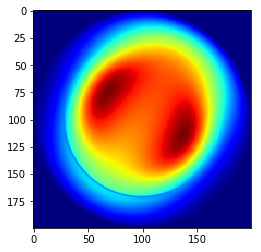

In [6]:
fig1 = plt.figure()
plt.imshow(nP_Test1, cmap='jet')
plt.show()

## Test the fitting process

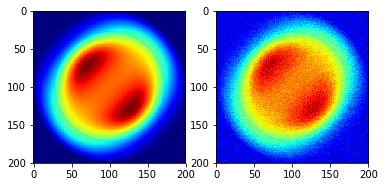

In [11]:
angle_exp = np.array([np.pi * 0, np.pi/4, np.pi/2])
noise_factor=0.03
pattern_exp=D1.Cal_PatternUp_List_QD_Angle(angle_exp[0], angle_exp[1], angle_exp[2])
pattern_noise=pattern_exp+noise_factor * pattern_exp.max() * np.random.normal(size=pattern_exp.shape)

fig = plt.figure()
plt.subplot(121)
plt.imshow(pattern_exp, cmap='jet')
plt.subplot(122)
plt.imshow(pattern_noise, cmap='jet')
plt.show()

In [12]:
kx_grid_1d, ky_grid_1d = np.ravel(kx_grid), np.ravel(ky_grid)
kxy = np.transpose(np.vstack((kx_grid_1d, ky_grid_1d)))
para_bounds = ([0, 0, 0], [np.pi, 2*np.pi, 2*np.pi])
angel_fit,errors = D1.BFP_Curvefit_List_Angle(kxy, np.ravel(pattern_noise), [
                            0.5*np.pi+0.1, 0.11, 0.1], para_bounds)

2020-07-27 19:56:05: Begin To Fit
2020-07-27 19:56:05: Iteration Step  1
2020-07-27 19:56:05: Iteration Step  2
2020-07-27 19:56:05: Iteration Step  3
2020-07-27 19:56:05: Iteration Step  4
2020-07-27 19:56:05: Iteration Step  5
2020-07-27 19:56:05: Iteration Step  6
2020-07-27 19:56:05: Iteration Step  7
2020-07-27 19:56:05: Iteration Step  8
2020-07-27 19:56:05: Iteration Step  9
2020-07-27 19:56:05: Iteration Step  10
2020-07-27 19:56:05: Iteration Step  11
2020-07-27 19:56:05: Iteration Step  12
2020-07-27 19:56:05: Iteration Step  13
2020-07-27 19:56:05: Iteration Step  14
2020-07-27 19:56:05: Iteration Step  15
2020-07-27 19:56:05: Iteration Step  16
2020-07-27 19:56:05: Iteration Step  17
2020-07-27 19:56:06: Iteration Step  18
2020-07-27 19:56:06: Iteration Step  19
2020-07-27 19:56:06: Iteration Step  20
2020-07-27 19:56:06: Iteration Step  21
2020-07-27 19:56:06: Iteration Step  22
2020-07-27 19:56:06: Iteration Step  23
2020-07-27 19:56:06: Iteration Step  24
2020-07-27 19:5

2020-07-27 19:59:22: Iteration Step  67


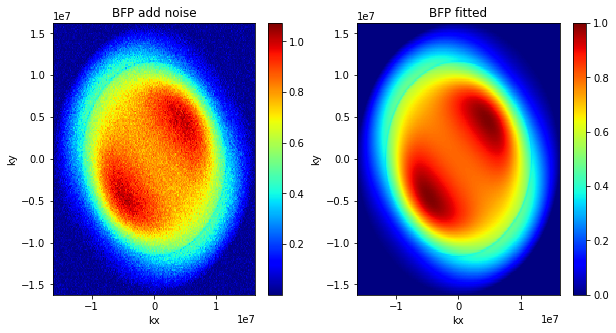

In [17]:
Pattern_fit_1d = D1.Cal_Pattern_List_QD_Fit_Angle(
     kxy, angel_fit[0], angel_fit[1], angel_fit[2])
Pattern_fit=np.reshape(Pattern_fit_1d,(num_kx,num_ky))
fig5=plt.figure(figsize=(10,5))
plt.subplot(121)
plt.pcolormesh(kx_grid, ky_grid, abs(pattern_noise),
                cmap='jet')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar()
plt.title('BFP add noise')

plt.subplot(122)
plt.pcolormesh(kx_grid, ky_grid, abs(Pattern_fit),
                cmap='jet')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar()
plt.title('BFP fitted')
plt.show()

## Sweep the parameters

In [31]:
num_alpha = 10
num_phi1 = 12
num_phi2 = 1
alpha_mat = np.linspace(0, np.pi, num_aplha)
phi_1mat = np.linspace(0, 2*np.pi, num_phi1)
phi_2mat = np.linspace(0, 2*np.pi, num_phi2)

num=num_aplha*num_phi1*num_phi2
anglefit_mat=np.zeros((num_aplha,3,3))
# alpha_matfit = np.zeros(num)
# phi_1matfit = np.zeros(num)
# phi_2matfit = np.zeros(num)
noise_factormat=np.array([0.01,0.03,0.1])
for l in range(num_alpha):
    for m in range(3):
                angle_exp = np.array([alpha_mat[l],np.pi/4, np.pi/2])
                noise_factor = noise_factormat[m]
                pattern_exp = D1.Cal_PatternUp_List_QD_Angle(
                    angle_exp[0], angle_exp[1], angle_exp[2])
                pattern_noise = pattern_exp+noise_factor * \
                    pattern_exp.max() * np.random.normal(size=pattern_exp.shape)
                angel_fit, errors = D1.BFP_Curvefit_List_Angle(kxy, np.ravel(pattern_noise), [
                    alpha_mat[l]+0.1,np.pi/4, np.pi/2], para_bounds)
                anglefit_mat[l,m,:]=angel_fit

2020-07-27 18:05:50: Begin To Fit
2020-07-27 18:05:50: Iteration Step  1
2020-07-27 18:05:50: Iteration Step  2
2020-07-27 18:05:50: Iteration Step  3
2020-07-27 18:05:50: Iteration Step  4
2020-07-27 18:05:50: Iteration Step  5
2020-07-27 18:05:50: Iteration Step  6
2020-07-27 18:05:50: Iteration Step  7
2020-07-27 18:05:50: Iteration Step  8
2020-07-27 18:05:50: Iteration Step  9
2020-07-27 18:05:50: Iteration Step  10
2020-07-27 18:05:50: Iteration Step  11
2020-07-27 18:05:50: Iteration Step  12
2020-07-27 18:05:51: Iteration Step  13
2020-07-27 18:05:51: Iteration Step  14
2020-07-27 18:05:51: Iteration Step  15
2020-07-27 18:05:51: Iteration Step  16
2020-07-27 18:05:51: Iteration Step  17
2020-07-27 18:05:51: Iteration Step  18
2020-07-27 18:05:51: Iteration Step  19
2020-07-27 18:05:51: Iteration Step  20
2020-07-27 18:05:51: Iteration Step  21
2020-07-27 18:05:51: Iteration Step  22
2020-07-27 18:05:51: Iteration Step  23
2020-07-27 18:05:51: Iteration Step  24
2020-07-27 18:0

2020-07-27 18:05:59: Iteration Step  5
2020-07-27 18:05:59: Iteration Step  6
2020-07-27 18:05:59: Iteration Step  7
2020-07-27 18:05:59: Iteration Step  8
2020-07-27 18:05:59: Iteration Step  9
2020-07-27 18:05:59: Iteration Step  10
2020-07-27 18:05:59: Iteration Step  11
2020-07-27 18:05:59: Iteration Step  12
2020-07-27 18:05:59: Iteration Step  13
2020-07-27 18:05:59: Iteration Step  14
2020-07-27 18:05:59: Iteration Step  15
2020-07-27 18:05:59: Iteration Step  16
2020-07-27 18:05:59: Iteration Step  17
2020-07-27 18:05:59: Iteration Step  18
2020-07-27 18:05:59: Iteration Step  19
2020-07-27 18:05:59: Iteration Step  20
2020-07-27 18:06:00: Iteration Step  21
Fit R-squared: 0.999195652532711 

Fit alpha : 0.918327584698599 ± 4986.771300656438
Fit phi_1:  0.9445699980572085 ± 5267.7457629889095
Fit phi_2:  1.6565879259625491 ± 8676.186408087842
2020-07-27 18:06:00: Begin To Fit
2020-07-27 18:06:00: Iteration Step  1
2020-07-27 18:06:00: Iteration Step  2
2020-07-27 18:06:00: Iter

2020-07-27 18:06:07: Iteration Step  5
2020-07-27 18:06:07: Iteration Step  6
2020-07-27 18:06:07: Iteration Step  7
2020-07-27 18:06:07: Iteration Step  8
2020-07-27 18:06:07: Iteration Step  9
2020-07-27 18:06:07: Iteration Step  10
2020-07-27 18:06:07: Iteration Step  11
2020-07-27 18:06:07: Iteration Step  12
2020-07-27 18:06:07: Iteration Step  13
2020-07-27 18:06:07: Iteration Step  14
2020-07-27 18:06:07: Iteration Step  15
2020-07-27 18:06:07: Iteration Step  16
2020-07-27 18:06:07: Iteration Step  17
2020-07-27 18:06:08: Iteration Step  18
2020-07-27 18:06:08: Iteration Step  19
2020-07-27 18:06:08: Iteration Step  20
2020-07-27 18:06:08: Iteration Step  21
2020-07-27 18:06:08: Iteration Step  22
2020-07-27 18:06:08: Iteration Step  23
2020-07-27 18:06:08: Iteration Step  24
2020-07-27 18:06:08: Iteration Step  25
2020-07-27 18:06:08: Iteration Step  26
2020-07-27 18:06:08: Iteration Step  27
2020-07-27 18:06:08: Iteration Step  28
2020-07-27 18:06:08: Iteration Step  29
2020-

2020-07-27 18:06:16: Iteration Step  25
2020-07-27 18:06:16: Iteration Step  26
2020-07-27 18:06:16: Iteration Step  27
2020-07-27 18:06:16: Iteration Step  28
2020-07-27 18:06:16: Iteration Step  29
2020-07-27 18:06:16: Iteration Step  30
2020-07-27 18:06:16: Iteration Step  31
2020-07-27 18:06:16: Iteration Step  32
2020-07-27 18:06:16: Iteration Step  33
2020-07-27 18:06:16: Iteration Step  34
2020-07-27 18:06:16: Iteration Step  35
2020-07-27 18:06:16: Iteration Step  36
2020-07-27 18:06:16: Iteration Step  37
2020-07-27 18:06:16: Iteration Step  38
2020-07-27 18:06:16: Iteration Step  39
2020-07-27 18:06:16: Iteration Step  40
2020-07-27 18:06:17: Iteration Step  41
2020-07-27 18:06:17: Iteration Step  42
2020-07-27 18:06:17: Iteration Step  43
2020-07-27 18:06:17: Iteration Step  44
2020-07-27 18:06:17: Iteration Step  45
Fit R-squared: 0.9334860877181378 

Fit alpha : 1.679203785884005 ± 11833.788975223297
Fit phi_1:  1.6970158702570541 ± 10149.5424631703
Fit phi_2:  1.686897974

2020-07-27 18:06:24: Iteration Step  3
2020-07-27 18:06:24: Iteration Step  4
2020-07-27 18:06:24: Iteration Step  5
2020-07-27 18:06:24: Iteration Step  6
2020-07-27 18:06:24: Iteration Step  7
2020-07-27 18:06:24: Iteration Step  8
2020-07-27 18:06:24: Iteration Step  9
2020-07-27 18:06:25: Iteration Step  10
2020-07-27 18:06:25: Iteration Step  11
2020-07-27 18:06:25: Iteration Step  12
2020-07-27 18:06:25: Iteration Step  13
2020-07-27 18:06:25: Iteration Step  14
2020-07-27 18:06:25: Iteration Step  15
2020-07-27 18:06:25: Iteration Step  16
2020-07-27 18:06:25: Iteration Step  17
2020-07-27 18:06:25: Iteration Step  18
2020-07-27 18:06:25: Iteration Step  19
2020-07-27 18:06:25: Iteration Step  20
2020-07-27 18:06:25: Iteration Step  21
2020-07-27 18:06:25: Iteration Step  22
2020-07-27 18:06:25: Iteration Step  23
2020-07-27 18:06:25: Iteration Step  24
2020-07-27 18:06:25: Iteration Step  25
2020-07-27 18:06:25: Iteration Step  26
2020-07-27 18:06:25: Iteration Step  27
2020-07

ValueError: `x0` is infeasible.

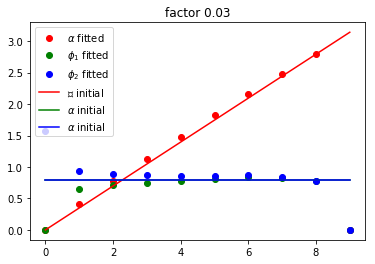

In [29]:
fig1=plt.figure()
plt.plot(anglefit_mat[:,0],'ro',label='$\\alpha$ fitted')
plt.plot(anglefit_mat[:,1],'go',label='$\\phi_{1}$ fitted')
plt.plot(anglefit_mat[:,2],'bo',label='$\\phi_{2}$ fitted')
plt.plot(alpha_mat,'r-',label='$、\alpha$ initial')
plt.plot(np.pi/4*np.ones(num_alpha),'g-',label='$\\alpha$ initial')
plt.plot(np.pi/4*np.ones(num_alpha),'b-',label='$\\alpha$ initial')
plt.title('factor 0.03')
plt.legend(loc='best')
plt.show()

c:\users\xiail\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'rm' does not have a glyph for '\u3001' [U+3001], substituting with a dummy symbol.
  MathTextWarning)


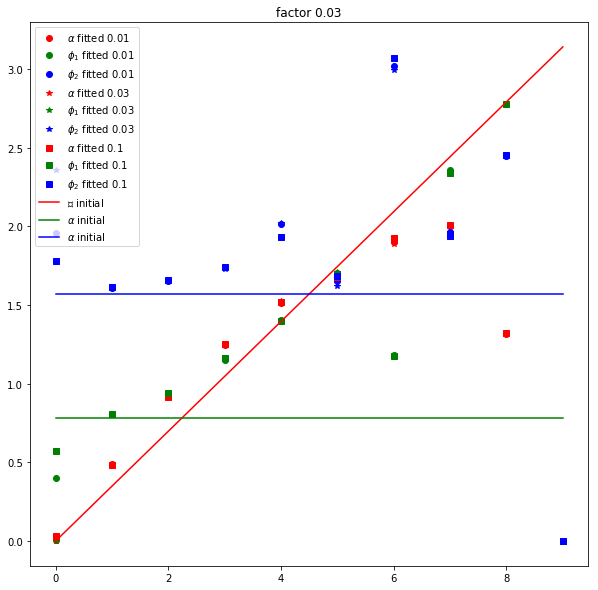

In [38]:
fig1=plt.figure(figsize=(10,10))
plt.plot(anglefit_mat[:,0,0],'ro',label='$\\alpha$ fitted 0.01')
plt.plot(anglefit_mat[:,0,1],'go',label='$\\phi_{1}$ fitted 0.01')
plt.plot(anglefit_mat[:,0,2],'bo',label='$\\phi_{2}$ fitted 0.01')
plt.plot(anglefit_mat[:,1,0],'r*',label='$\\alpha$ fitted 0.03')
plt.plot(anglefit_mat[:,1,1],'g*',label='$\\phi_{1}$ fitted 0.03')
plt.plot(anglefit_mat[:,1,2],'b*',label='$\\phi_{2}$ fitted 0.03')
plt.plot(anglefit_mat[:,2,0],'rs',label='$\\alpha$ fitted 0.1')
plt.plot(anglefit_mat[:,2,1],'gs',label='$\\phi_{1}$ fitted 0.1')
plt.plot(anglefit_mat[:,2,2],'bs',label='$\\phi_{2}$ fitted 0.1')
plt.plot(alpha_mat,'r-',label='$、\alpha$ initial')
plt.plot(np.pi/4*np.ones(num_alpha),'g-',label='$\\alpha$ initial')
plt.plot(np.pi/2*np.ones(num_alpha),'b-',label='$\\alpha$ initial')
plt.title('factor 0.03')
plt.legend(loc='best')
plt.show()